# One-Dimensional Exponential Speckle

**Scott Prahl**

**June 2018**


In [1]:
%matplotlib inline
import imageio
import numpy as np
import matplotlib.pyplot as plt
import pyspeckle

#### To solve "No module named 'pyspeckle'" uncomment the following two lines to install `pyspeckle`
#import sys
#!{sys.executable} -m pip install pyspeckle

def autocorr(x):
    """
    Find the autocorrelation of the array x
    
    This is a little different from the standard autocorrelation because 
    (1) the mean is subtracted before correlation
    (2) the autocorrelation is normalized to maximum value
    (3) only the right hand side of the symmetric function is returned
    """    
    mean = np.mean(x)
    x -= mean
    result = np.correlate(x, x, mode='full')
# could also use the faster(?)
#   result = signal.fftconvolve(sig, sig[::-1], mode='full')

    mx = np.max(result)
    middle = len(result)//2
    return result[middle:]/mx

## Test average and standard deviation

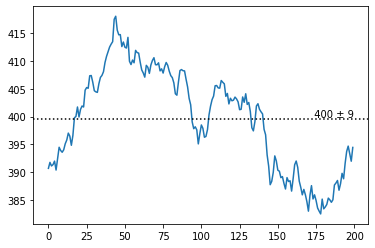

In [2]:
M=200
x=np.linspace(0,M-1,M)

stdev = 10
avg   = 400
tau   = 100
y = pyspeckle.create_exp_1D(M,avg,stdev,tau)

ave = np.mean(y)
std = np.sqrt(np.var(y))

plt.plot(x,y)
plt.axhline(ave, ls=':', color='black')
plt.text(M, ave, "  %.0f ± %.0f"%(ave,std), ha='right', va='bottom')
plt.show()

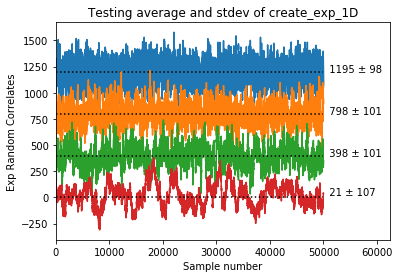

In [3]:
M=50000
x=np.linspace(0,M-1,M)
stdev=100

avg=1200
y = pyspeckle.create_exp_1D(M,avg,stdev,20)
ave = np.mean(y)
std = np.sqrt(np.var(y))
plt.annotate("  %.0f ± %.0f"%(ave,std),xy=(M,ave))
plt.plot(y)
plt.plot([0,M],[avg,avg],':k')

avg=800
y = pyspeckle.create_exp_1D(M,avg,stdev,50)
ave = np.mean(y)
std = np.sqrt(np.var(y))
plt.annotate("  %.0f ± %.0f"%(ave,std),xy=(M,ave))
plt.plot(y)
plt.plot([0,M],[avg,avg],':k')

avg=400
y = pyspeckle.create_exp_1D(M,avg,stdev,100)
ave = np.mean(y)
std = np.sqrt(np.var(y))
plt.annotate("  %.0f ± %.0f"%(ave,std),xy=(M,ave))
plt.plot(x,y)
plt.plot([0,M],[avg,avg],':k')

avg=0
y = pyspeckle.create_exp_1D(M,avg,stdev,500)
ave = np.mean(y)
std = np.sqrt(np.var(y))
plt.annotate("  %.0f ± %.0f"%(ave,std),xy=(M,ave))
plt.plot(y)
plt.plot([0,M],[avg,avg],':k')

plt.xlim(0,M*1.25)
plt.title("Testing average and stdev of create_exp_1D")
plt.xlabel('Sample number')
plt.ylabel('Exp Random Correlates')
plt.show()

## Test autocorrelation shape

The points should be distributed to have the shape
$$
\langle X,X\rangle = \exp\left(-\frac{x}{\tau}\right)
$$

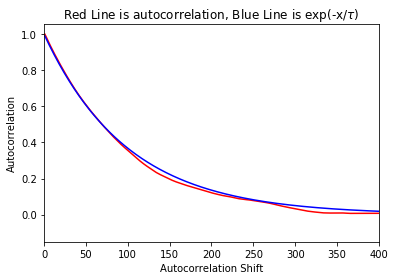

In [9]:
M= 50000
tau = 100

x = np.linspace(1,M+1,M)
y = pyspeckle.create_exp_1D(M,200,100,tau)

ac = autocorr(y)
plt.plot(x,ac,color='red')

plt.xlim(0,4*tau)
plt.plot(x,np.exp(-x/tau),color='blue')

plt.title(r"Red Line is autocorrelation, Blue Line is exp(-x/$\tau$)")
plt.xlabel('Autocorrelation Shift')
plt.ylabel('Autocorrelation')

plt.show()

In [10]:
def create_gaussian_1D(M, mean, stdev, tau):
    """
    Generate an array of length M of values with Gaussian autocorrelation

        The returned array will the specified mean and standard deviation but
        will also have an autocorrelation function given by exp(-1/tau**2)

        Args:
        M     dimension of desired array
        mean  average value of signal
        std   standard deviation of signal
        tau   exp(-2/tau^2) is the autocorrelation

        Returns:
                array of length M
                
    (Still needs more testing!)
    """
    t = np.linspace(0, M-1, M)
    Z = np.random.rand(M) # uncorrelated white noise distribution
    F = np.exp(-t**2/tau**2)      # Gaussian filter

    # correlation of signal using convolution, inverse Fourier transform 
    f = np.fft.fftshift(np.fft.fft(Z * F))
    
    return abs(f)

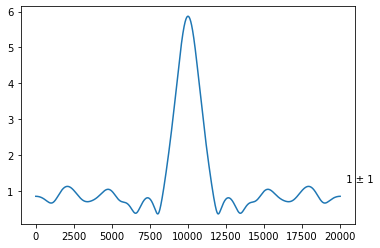

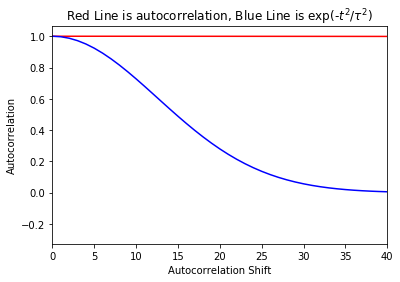

In [11]:
M=20000
x=np.linspace(0,M-1,M)
stdev=50
tau = 100
avg = 500

y = create_gaussian_1D(M,avg,stdev,tau)
ave = np.mean(y)
std = np.sqrt(np.var(y))
plt.annotate("  %.0f ± %.0f"%(ave,std),xy=(M,ave))
plt.plot(x,y)
plt.show()

ac = autocorr(y)
plt.plot(x,ac,color='red')

plt.xlim(0,4*tau)
plt.plot(x,np.exp(-x**2/tau**2/np.pi),color='blue')

plt.title(r"Red Line is autocorrelation, Blue Line is exp(-$t^2/\tau^2$)")
plt.xlabel('Autocorrelation Shift')
plt.ylabel('Autocorrelation')

plt.show()